In [3]:
import numpy as np
import pandas as pd

routes = pd.read_csv("routes.csv", encoding = 'latin-1')
species = pd.read_csv("SpeciesList.csv")
wa_observes = pd.read_csv("Washing.csv")
weather = pd.read_csv("Weather.csv")
wa_weather = weather[weather["StateNum"] == 89]
mt_rainier_weather = wa_weather[wa_weather["Route"] == 61].drop(["CountryNum", "StateNum", "Route"], axis = 1)
bay_view_weather = wa_weather[wa_weather["Route"] == 66]
#WA State num -> 89

### Rainier Weather Cleanup

In [6]:
noaa_longmire = pd.read_csv("Longmire_Ranier_Weather_Monthly.csv")
noaa_paradise = pd.read_csv("Ranger_Station_Ranier_Weather_Monthly.csv")

#EMNT: extreme monthly min daily temp
#EMXT: extreme montly max daily temp
#PRCP: total monthly precip

noaa_longmire = noaa_longmire[["DATE", "EMNT", "EMXT",	"PRCP",	"TAVG",	"TMAX",	"TMIN"]]
noaa_paradise = noaa_paradise.drop(["STATION", "NAME", "CDSD", "HDSD"], axis = 1)

noaa_weather_rainier = pd.merge(noaa_longmire, noaa_paradise, on = ["DATE", "DATE"])

# The two locations are 10 miles apart so I feel good averaging the two to make
# more substantial data accuracy for the months

def avg_cols(df1, df2, cols_to_avg):
    result = df1.copy()
    for col in cols_to_avg:
        result[col] = np.nanmean([df1[col], df2[col]], axis = 0)

    return result

noaa_weather_rainier = avg_cols(noaa_longmire[0:519], noaa_paradise, ["EMNT", "EMXT", "PRCP", "TAVG", "TMAX", "TMIN"])

june = []
for year in range(1980, 2026):
    june_date = f"{year}-06"
    june_row = noaa_weather_rainier[noaa_weather_rainier["DATE"] == june_date]

    if not june_row.empty:
        june.append(june_row)

noaa_rainier_june = pd.concat(june, ignore_index = True)
noaa_rainier_june['DATE'] = noaa_rainier_june['DATE'].str.replace('-06', '')
noaa_rainier_june['DATE'] = noaa_rainier_june['DATE'].astype(int)
noaa_rainier_june.tail(50)

C:\Users\nnaga\AppData\Local\Temp\ipykernel_14132\2000027070.py:19: RuntimeWarning: Mean of empty slice
  result[col] = np.nanmean([df1[col], df2[col]], axis = 0)


,DATE,EMNT,EMXT,PRCP,TAVG,TMAX,TMIN
0,1980,30.0,74.5,3.635,49.45,58.25,40.65
1,1981,31.5,79.5,5.975,50.25,58.95,41.50
2,1982,32.0,84.5,4.270,51.90,61.75,42.00
3,1983,34.0,78.5,2.860,52.00,61.20,42.65
4,1984,34.0,80.5,2.930,55.15,65.20,45.10
5,1985,32.5,82.0,3.175,51.05,61.65,40.45
6,1986,33.5,84.0,2.210,53.80,64.90,42.75
7,1987,32.0,88.0,1.205,55.10,67.35,42.85
8,1988,32.5,80.5,2.120,51.65,61.35,41.95
9,1989,32.0,89.5,3.455,55.15,67.10,43.20


### Bird Species Cleanup

In [9]:
wa_routes = routes[routes["StateNum"] == 89]

mt_rainier = wa_observes[wa_observes["Route"] == 61] #mountain
bay_view = wa_observes[wa_observes["Route"] == 66] #waterfront

mt_rainier_species_obs = pd.merge(mt_rainier, species, on = ["AOU", "AOU"])
mt_rainier_species_obs = pd.merge(mt_rainier_species_obs, mt_rainier_weather, on = ["RouteDataID", "RouteDataID"])
mt_rainier_species_obs = mt_rainier_species_obs[["Year_x", "English_Common_Name", "SpeciesTotal", "Month", "Day", "StartTemp", "EndTemp"]]
mt_rainier_species_obs["AvgTemp"] = (mt_rainier_species_obs["EndTemp"] + mt_rainier_species_obs["StartTemp"])/2
mt_rainier_species_obs = mt_rainier_species_obs.drop(["StartTemp", "EndTemp"], axis = 1)
mt_rainier_species_obs = mt_rainier_species_obs.rename(columns = {"Year_x" : "DATE"})
mt_rainier_species_obs = mt_rainier_species_obs.rename(columns = {"AvgTemp" : "Obs_Temp"})

sooty_grouse_rainier = mt_rainier_species_obs[mt_rainier_species_obs["English_Common_Name"] == "Sooty Grouse"]
sooty_grouse_rainier = sooty_grouse_rainier.drop(["English_Common_Name"], axis = 1)
print(sooty_grouse_rainier)

bay_view_species_obs = pd.merge(bay_view, species, on = ["AOU", "AOU"])
bay_view_species_obs = pd.merge(bay_view_species_obs, bay_view_weather, on = ["RouteDataID", "RouteDataID"])
bay_view_species_obs = bay_view_species_obs[["Year_x", "English_Common_Name", "SpeciesTotal", "Month", "Day", "StartTemp", "EndTemp"]]
bay_view_species_obs["AvgTemp"] = (bay_view_species_obs["EndTemp"] + bay_view_species_obs["StartTemp"])/2
bay_view_species_obs = bay_view_species_obs.drop(["StartTemp", "EndTemp"], axis = 1)
bay_view_species_obs = bay_view_species_obs.rename(columns = {"Year_x" : "DATE"})
bay_view_species_obs = bay_view_species_obs.rename(columns = {"AvgTemp" : "Obs_Temp"})

wilsons_warbler_bay_view = bay_view_species_obs[bay_view_species_obs["English_Common_Name"] == "Wilson's Warbler"]
wilsons_warbler_bay_view = wilsons_warbler_bay_view.drop(["English_Common_Name"], axis = 1)

wilsons_warbler_rainier = mt_rainier_species_obs[mt_rainier_species_obs["English_Common_Name"] == "Wilson's Warbler"]
wilsons_warbler_rainier = wilsons_warbler_rainier.drop(["English_Common_Name"], axis = 1)
print(wilsons_warbler_rainier)

     DATE  SpeciesTotal  Month  Day  Obs_Temp
32   1991             6      6   27      49.5
109  1993             5      6   24      47.5
146  1994             6      6   13      48.5
228  1998             1      6   19      51.0
260  1999             4      6   27      53.5
299  2000             2      6   17      60.0
338  2001             4      6   18      53.0
400  2003             5      6   15      54.0
467  2006            11      6   14      62.5
497  2007             2      6   21      65.0
538  2008             6      6   19      42.5
572  2009             2      6   19      50.5
605  2010             4      6   23      49.5
636  2011             4      6   21      54.5
671  2012             4      6   23      48.5
706  2013             2      6   28      53.0
733  2014             2      6   23      49.0
770  2015             3      6   16      51.5
807  2016             1      6   21      46.0
839  2018             2      6   21      57.5
868  2019             2      6   1

### Merging NOAA Weather and Species Data

In [12]:
sooty_grouse_rainier = pd.merge(sooty_grouse_rainier, noaa_rainier_june[11:42], on = ["DATE", "DATE"])
print(sooty_grouse_rainier.head())

   DATE  SpeciesTotal  Month  Day  Obs_Temp  EMNT  EMXT    PRCP   TAVG   TMAX  \
0  1991             6      6   27      49.5  32.0  80.5   2.615  52.95  62.80   
1  1993             5      6   24      47.5  26.5  71.0   9.455  44.35  53.30   
2  1994             6      6   13      48.5  27.5  70.5   9.455  44.40  53.55   
3  1998             1      6   19      51.0  25.5  62.5  12.195  39.50  48.05   
4  1999             4      6   27      53.5  23.5  69.5   6.405  39.60  47.40   

    TMIN  
0  43.10  
1  35.45  
2  35.25  
3  30.95  
4  31.75  


In [14]:
wilsons_warbler_rainier = pd.merge(wilsons_warbler_rainier, noaa_rainier_june[10:42], on = ["DATE", "DATE"])
print(wilsons_warbler_rainier.head())

   DATE  SpeciesTotal  Month  Day  Obs_Temp  EMNT  EMXT   PRCP   TAVG   TMAX  \
0  1990             5      7   10      64.0  32.5  83.5  5.635  54.30  64.45   
1  1991             6      6   27      49.5  32.0  80.5  2.615  52.95  62.80   
2  1992            17      6   27      63.0  33.0  84.5  1.740  55.15  66.65   
3  1993            18      6   24      47.5  26.5  71.0  9.455  44.35  53.30   
4  1994            12      6   13      48.5  27.5  70.5  9.455  44.40  53.55   

    TMIN  
0  44.05  
1  43.10  
2  43.60  
3  35.45  
4  35.25  


In [16]:
sooty_grouse_rainier.to_csv("SootyGrouseRainier")

In [18]:
wilsons_warbler_rainier.to_csv("WilsonsWarblerRainier")

### Linear Regression

Mean Squared Error: 9.486165245078704
R-squared: -0.08222448570616181


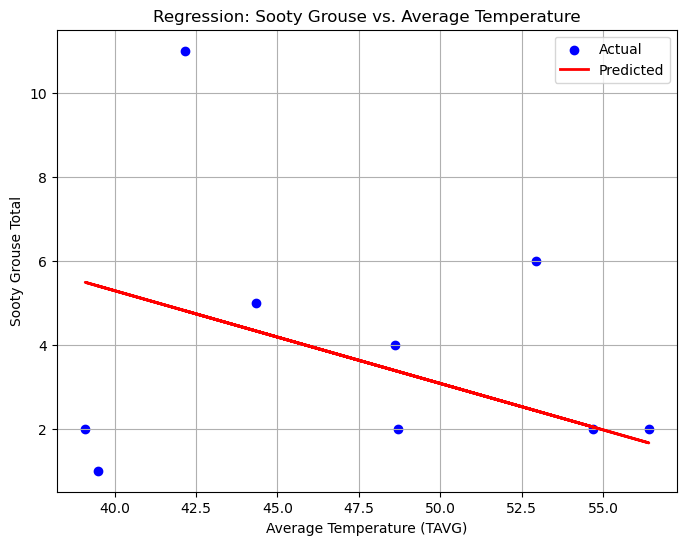

In [21]:
### Simple Linear Regression (Sooty Grouse)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Define the feature and target
X = sooty_grouse_rainier[['TAVG']]  # Feature (average temperature)
y = sooty_grouse_rainier['SpeciesTotal']  # Target (species total)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
    # negative r-squared value shows that TAVG has a weak relationship with SpeciesTotal

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('Sooty Grouse Total')
plt.title('Regression: Sooty Grouse vs. Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 15.399522044126195
R-squared: -0.569777986149459


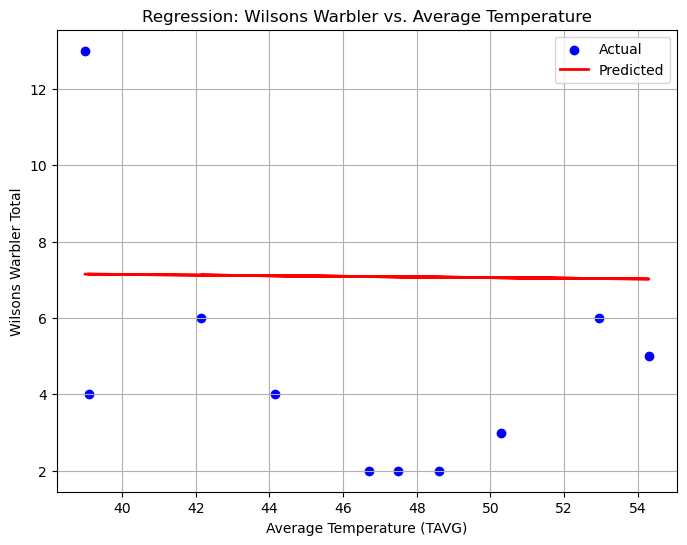

In [22]:
### Simple Linear Regression (Wilsons Warbler)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Define the feature and target
X = wilsons_warbler_rainier[['TAVG']]  # Feature (average temperature)
y = wilsons_warbler_rainier['SpeciesTotal']  # Target (species total)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
    # negative r-squared value shows that TAVG has a weak relationship with SpeciesTotal

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('Wilsons Warbler Total')
plt.title('Regression: Wilsons Warbler vs. Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
### Non-Linear Regressions

max(X['TAVG'])

55.8

In [24]:
### Linear Regression: Multiple Predictors

In [26]:
import statsmodels.api as sm
import pandas as pd

# Add interaction terms/ transformations that might be effective
wilsons_warbler_rainier['TAVG_EMT'] = wilsons_warbler_rainier['EMNT'] * wilsons_warbler_rainier['TAVG']
wilsons_warbler_rainier['TMAX_EMXT'] = wilsons_warbler_rainier['EMXT'] * wilsons_warbler_rainier['TMAX']
wilsons_warbler_rainier['log_TAVG'] = np.log(wilsons_warbler_rainier['TAVG'])
wilsons_warbler_rainier['log_PCRP'] = np.log(wilsons_warbler_rainier['PRCP'])

# Define the target variable (SpeciesTotal)
y = wilsons_warbler_rainier['SpeciesTotal']

# Define the feature variables (all columns except 'SpeciesTotal')
X = wilsons_warbler_rainier.drop(columns=['SpeciesTotal'])

# Add a constant (intercept) term to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


### Remove non significant predictors, add interaction terms

# Assuming your data is stored in a DataFrame named `df`
# Prepare predictors and response variable
X = wilsons_warbler_rainier[['DATE', 'Day', 'PRCP', 'EMXT', 'TMAX', 'TAVG_EMT', 'log_PCRP']]  # Add any other predictors if needed
y = wilsons_warbler_rainier['SpeciesTotal']

# Add constant to the predictors (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2.661
Date:                Mon, 10 Mar 2025   Prob (F-statistic):             0.0719
Time:                        11:12:06   Log-Likelihood:                -51.315
No. Observations:                  24   AIC:                             132.6
Df Residuals:                       9   BIC:                             150.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -579.1969   1372.120     -0.422      0.6

In [30]:
import statsmodels.api as sm
import pandas as pd

# Add interaction terms and variable transformations
sooty_grouse_rainier['TAVG_EMT'] = sooty_grouse_rainier['EMNT'] * sooty_grouse_rainier['TAVG']
sooty_grouse_rainier['TMAX_EMXT'] = sooty_grouse_rainier['EMXT'] * sooty_grouse_rainier['TMAX']
sooty_grouse_rainier['log_TAVG'] = np.log(sooty_grouse_rainier['TAVG'])
sooty_grouse_rainier['log_PCRP'] = np.log(sooty_grouse_rainier['PRCP'])

# Define the target variable (SpeciesTotal)
y = sooty_grouse_rainier['SpeciesTotal']

# Define the feature variables (all columns except 'SpeciesTotal')
X = sooty_grouse_rainier.drop(columns=['SpeciesTotal'])

# Add a constant (intercept) term to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

### Remove non significant predictors, add interaction terms

# Assuming your data is stored in a DataFrame named `df`
# Prepare predictors and response variable
X = sooty_grouse_rainier[['DATE', 'Day', 'EMXT', 'PRCP', 'TAVG', 'TAVG_EMT', 'TMAX_EMXT', 'log_PCRP']]  # Add any other predictors if needed
y = sooty_grouse_rainier['SpeciesTotal']

# Add constant to the predictors (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2.982
Date:                Mon, 10 Mar 2025   Prob (F-statistic):             0.0634
Time:                        11:12:07   Log-Likelihood:                -29.375
No. Observations:                  22   AIC:                             86.75
Df Residuals:                       8   BIC:                             102.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DATE          -0.2026      0.054     -3.721      0.0

In [32]:
### Model Evaluation

In [45]:
# Leave One Out Cross Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = wilsons_warbler_rainier.drop(columns=["SpeciesTotal"])  # Independent variables
y = wilsons_warbler_rainier["SpeciesTotal"]  # Dependent variable

loo = LeaveOneOut()
model = LinearRegression()
mse_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error([y_test], [y_pred]))

loo_mse = np.mean(mse_scores)
print(f"LOOCV Mean Squared Error (Simple Model): {loo_mse}")

X = wilsons_warbler_rainier[['DATE', 'Day', 'PRCP', 'EMXT', 'TMAX', 'TAVG_EMT', 'log_PCRP']] 
y = wilsons_warbler_rainier['SpeciesTotal']

loo = LeaveOneOut()
model = LinearRegression()
mse_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error([y_test], [y_pred]))

loo_mse = np.mean(mse_scores)
print(f"LOOCV Mean Squared Error (Improved Model): {loo_mse}")


LOOCV Mean Squared Error (Simple Model): 4536.997651334504
LOOCV Mean Squared Error (Improved Model): 17.494030479782968


In [47]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = sooty_grouse_rainier.drop(columns=["SpeciesTotal"])  # Independent variables
y = sooty_grouse_rainier["SpeciesTotal"]  # Dependent variable

loo = LeaveOneOut()
model = LinearRegression()
mse_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error([y_test], [y_pred]))

loo_mse = np.mean(mse_scores)
print(f"LOOCV Mean Squared Error (Simple Model): {loo_mse}")

X = sooty_grouse_rainier[['DATE', 'Day', 'PRCP', 'EMXT', 'TMAX', 'TAVG_EMT', 'log_PCRP']] 
y = sooty_grouse_rainier['SpeciesTotal']

loo = LeaveOneOut()
model = LinearRegression()
mse_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error([y_test], [y_pred]))

loo_mse = np.mean(mse_scores)
print(f"LOOCV Mean Squared Error (Imrpvoed Model): {loo_mse}")

LOOCV Mean Squared Error (Simple Model): 144.12384415346958
LOOCV Mean Squared Error (Imrpvoed Model): 4.044369927299874


In [ ]:
### Ridge Regression

In [67]:
from sklearn.linear_model import Ridge, Lasso

y = wilsons_warbler_rainier['SpeciesTotal']
X = wilsons_warbler_rainier.drop(columns=['SpeciesTotal'])

ridge = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge.fit(X, y)
# Print model summary
print("### Ridge Regression Summary ###")
print(f"Intercept: {ridge.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"R-squared (R²): {ridge.score(X, y):.4f}")

# Compute Mean Squared Error (MSE) on full dataset
y_pred_full = ridge.predict(X)
full_mse = mean_squared_error(y, y_pred_full)
print(f"Mean Squared Error (Full Dataset): {full_mse:.4f}")


lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print(f"Lasso Regression Score: {lasso.score(X, y)}")


### Model Evaluation: LOOCV
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

loo = LeaveOneOut()
mse_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ridge_loo = Ridge(alpha=1.0) 
    ridge_loo.fit(X_train, y_train)
    
    y_pred = ridge_loo.predict(X_test)[0]  # Get scalar prediction
    mse_scores.append(mean_squared_error([y_test.values[0]], [y_pred]))

# Compute LOOCV MSE
loo_mse = np.mean(mse_scores)
print(f"LOOCV Mean Squared Error (Ridge): {loo_mse}")

### Ridge Regression Summary ###
Intercept: 551.7325
Coefficients:
  DATE: -0.3227
  Month: -1.6706
  Day: 0.3193
  Obs_Temp: 0.1221
  EMNT: 1.2885
  EMXT: 0.4052
  PRCP: 0.0233
  TAVG: -1.2793
  TMAX: 3.1881
  TMIN: -0.0204
  TAVG_EMT: -0.0293
  TMAX_EMXT: -0.0119
  log_TAVG: 0.0223
  log_PCRP: 1.2472
R-squared (R²): 0.7152
Mean Squared Error (Full Dataset): 6.1694
Lasso Regression Score: 0.6746106847889084
LOOCV Mean Squared Error (Ridge): 24.483088619691813


C:\Users\nnaga\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+00, tolerance: 5.198e-02
  model = cd_fast.enet_coordinate_descent(


In [69]:
from sklearn.linear_model import Ridge, Lasso

y = sooty_grouse_rainier['SpeciesTotal']
X = sooty_grouse_rainier.drop(columns=['SpeciesTotal'])

ridge = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge.fit(X, y)
# Print model summary
print("### Ridge Regression Summary ###")
print(f"Intercept: {ridge.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"R-squared (R²): {ridge.score(X, y):.4f}")

# Compute Mean Squared Error (MSE) on full dataset
y_pred_full = ridge.predict(X)
full_mse = mean_squared_error(y, y_pred_full)
print(f"Mean Squared Error (Full Dataset): {full_mse:.4f}")


lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print(f"Lasso Regression Score: {lasso.score(X, y)}")


### Model Evaluation: LOOCV
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

loo = LeaveOneOut()
mse_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ridge_loo = Ridge(alpha=1.0) 
    ridge_loo.fit(X_train, y_train)
    
    y_pred = ridge_loo.predict(X_test)[0]  # Get scalar prediction
    mse_scores.append(mean_squared_error([y_test.values[0]], [y_pred]))

# Compute LOOCV MSE
loo_mse = np.mean(mse_scores)
print(f"LOOCV Mean Squared Error (Ridge): {loo_mse}")

### Ridge Regression Summary ###
Intercept: 312.3055
Coefficients:
  DATE: -0.1899
  Month: 0.0000
  Day: -0.2432
  Obs_Temp: 0.1470
  EMNT: 0.5839
  EMXT: 1.2455
  PRCP: -0.4947
  TAVG: -0.0166
  TMAX: 0.3338
  TMIN: 0.0955
  TAVG_EMT: -0.0036
  TMAX_EMXT: -0.0132
  log_TAVG: 0.0129
  log_PCRP: 1.5171
R-squared (R²): 0.7666
Mean Squared Error (Full Dataset): 1.1541
Lasso Regression Score: 0.6976267378292678
LOOCV Mean Squared Error (Ridge): 4.39999563077808


C:\Users\nnaga\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+01, tolerance: 1.088e-02
  model = cd_fast.enet_coordinate_descent(


In [159]:
### Step Function
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrix
from sklearn.model_selection import train_test_split

# Discretize 'TAVG' into bins (Step Function)
wilsons_warbler_rainier['TAVG_binned'] = pd.cut(wilsons_warbler_rainier['TAVG'], bins=[-np.inf, 40, 45, 50, 55, np.inf], labels=[1, 2, 3, 4, 5])

# Convert 'TAVG_binned' to numeric
wilsons_warbler_rainier['TAVG_binned'] = wilsons_warbler_rainier['TAVG_binned'].astype(float)

# Prepare data for regression
X = wilsons_warbler_rainier[['TAVG_binned']]  # Predictor
y = wilsons_warbler_rainier['SpeciesTotal']   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Add constant (intercept term)
X_train = sm.add_constant(X_train)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                  0.001693
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.968
Time:                        16:33:50   Log-Likelihood:                -43.135
No. Observations:                  14   AIC:                             90.27
Df Residuals:                      12   BIC:                             91.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.2287      4.114      1.757      

C:\Users\nnaga\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


In [34]:
### Linear regression: TMIN, TMAX, TAVG, interactions with YEAR to predict SpeciesTotal

# Step 1: Prepare the data
# weather_mt = weather_mt.dropna(subset=["TMAX", "TMIN", "TAVG", "Year", "SpeciesTotal"])

# Add interaction terms with Year
sooty_grouse_rainier['Year_TMAX'] = sooty_grouse_rainier['DATE'] * sooty_grouse_rainier['TMAX']
sooty_grouse_rainier['Year_TMIN'] = sooty_grouse_rainier['DATE'] * sooty_grouse_rainier['TMIN']
sooty_grouse_rainier['Year_TAVG'] = sooty_grouse_rainier['DATE'] * sooty_grouse_rainier['TAVG']

# Step 2: Define the features and target
X = sooty_grouse_rainier[['TMAX', 'TMIN', 'TAVG', 'DATE', 'Year_TMAX', 'Year_TMIN', 'Year_TAVG']]
y = sooty_grouse_rainier['SpeciesTotal']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Output results
print("Mean Squared Error:", mse)
    # lower mse than previous regression -> much closer predictions than simple regression
    # model does a decent job at predicing species total 
print("R-squared:", r2)
    # 61% of varaince in SpeciesTotal is explained by the model

# Print coefficients for each feature
print("\nCoefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)
    # TMIX plays a significant role in determining species total

Mean Squared Error: 19.559705602919554
R-squared: -1.1636842481105698

Coefficients:
           Coefficient
TMAX      -4742.730157
TMIN      -4592.896888
TAVG       9461.450977
DATE          2.095374
Year_TMAX     2.363616
Year_TMIN     2.288692
Year_TAVG    -4.715017


In [85]:
### Linear regression: TMIN, TMAX, TAVG, interactions with YEAR to predict SpeciesTotal

# Step 1: Prepare the data
# weather_mt = weather_mt.dropna(subset=["TMAX", "TMIN", "TAVG", "Year", "SpeciesTotal"])

# Add interaction terms with Year
wilsons_warbler_rainier['Year_TMAX'] = wilsons_warbler_rainier['DATE'] * wilsons_warbler_rainier['TMAX']
wilsons_warbler_rainier['Year_TMIN'] = wilsons_warbler_rainier['DATE'] * wilsons_warbler_rainier['TMIN']
wilsons_warbler_rainier['Year_TAVG'] = wilsons_warbler_rainier['DATE'] * wilsons_warbler_rainier['TAVG']

# Step 2: Define the features and target
X = wilsons_warbler_rainier[['TMAX', 'TMIN', 'TAVG', 'DATE', 'Year_TMAX', 'Year_TMIN', 'Year_TAVG']]
y = wilsons_warbler_rainier['SpeciesTotal']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Output results
print("Mean Squared Error:", mse)
    # lower mse than previous regression -> much closer predictions than simple regression
    # model does a decent job at predicing species total 
print("R-squared:", r2)
    # 61% of varaince in SpeciesTotal is explained by the model

# Print coefficients for each feature
print("\nCoefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)
    # TMIX plays a significant role in determining species total

Mean Squared Error: 3.814900560332532
R-squared: -0.907450280166266

Coefficients:
            Coefficient
TMAX        9122.086844
TMIN        8590.935581
TAVG      -17850.874177
DATE          -1.178969
Year_TMAX     -4.545174
Year_TMIN     -4.280608
Year_TAVG      8.894702


In [113]:
### Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    ## Remove variable with WIF > 5

# Step 1: Prepare the data
# weather_mt = weather_mt.dropna(subset=["TMAX", "TMIN", "TAVG", "Year", "SpeciesTotal"])

# Add interaction terms with Year
wilsons_warbler_rainier['Year_TMAX'] = wilsons_warbler_rainier['DATE'] * wilsons_warbler_rainier['TMAX']
wilsons_warbler_rainier['Year_TAVG'] = wilsons_warbler_rainier['DATE'] * wilsons_warbler_rainier['TAVG']

# Step 2: Define the features and target
X = wilsons_warbler_rainier[['TMAX', 'TAVG', 'DATE', 'Year_TMAX', 'Year_TAVG']]
y = wilsons_warbler_rainier['SpeciesTotal']

# standarsize DATE 
X.loc[:, 'DATE'] = X['DATE'] - X['DATE'].min()  # Normalize to start from 0

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Output results
print("Mean Squared Error:", mse)
    # lower mse than previous regression -> much closer predictions than simple regression
    # model does a decent job at predicing species total 
print("R-squared:", r2)
    # 61% of varaince in SpeciesTotal is explained by the model

# Print coefficients for each feature
print("\nCoefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)
    # TMIX plays a significant role in determining species total

     Feature           VIF
0       TMAX  2.685892e+08
1       TAVG  2.897682e+08
2       DATE  2.074619e+02
3  Year_TMAX  2.681255e+08
4  Year_TAVG  2.895621e+08
Mean Squared Error: 8.637231302208566
R-squared: -3.318615651104283

Coefficients:
           Coefficient
TMAX        433.296461
TAVG       -545.812335
DATE         -1.015256
Year_TMAX    -0.215521
Year_TAVG     0.271706


In [97]:
### Random Stuff

In [79]:
#### Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select predictors (excluding non-numeric columns)
predictors = ['TAVG', 'TMAX', 'TMIN', 'PRCP', 'Obs_Temp', 'EMNT', 'EMXT']
X = sooty_grouse_rainier[predictors]
y = sooty_grouse_rainier['SpeciesTotal']
X = sm.add_constant(X)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Evaluate
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

# Fit the OLS regression model (Ordinary Least Squares)
model = sm.OLS(y_train, X_train).fit()

# Print summary, which includes coefficients, p-values, and R²
print(model.summary())


Linear Regression R²: -0.7181066139838082
Linear Regression RMSE: 3.941025728210059
                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.7219
Date:                Sat, 08 Mar 2025   Prob (F-statistic):              0.659
Time:                        16:01:37   Log-Likelihood:                -27.557
No. Observations:                  17   AIC:                             71.11
Df Residuals:                       9   BIC:                             77.78
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

C:\Users\nnaga\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [81]:
#### Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select predictors (excluding non-numeric columns)
predictors = ['TAVG', 'TMAX', 'TMIN', 'PRCP', 'Obs_Temp', 'EMNT', 'EMXT']
X = wilsons_warbler_rainier[predictors]
y = wilsons_warbler_rainier['SpeciesTotal']
X = sm.add_constant(X)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Evaluate
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

# Fit the OLS regression model (Ordinary Least Squares)
model = sm.OLS(y_train, X_train).fit()

# Print summary, which includes coefficients, p-values, and R²
print(model.summary())

Linear Regression R²: -7.935386764186715
Linear Regression RMSE: 4.227383768759755
                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.9554
Date:                Sat, 08 Mar 2025   Prob (F-statistic):              0.505
Time:                        16:01:45   Log-Likelihood:                -53.174
No. Observations:                  19   AIC:                             122.3
Df Residuals:                      11   BIC:                             129.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

C:\Users\nnaga\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [83]:
### Polynomial Regression

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Select predictors
predictors = ['TAVG', 'TMAX', 'TMIN', 'PRCP', 'Obs_Temp', 'EMNT', 'EMXT']
X = sooty_grouse_rainier[predictors]
y = sooty_grouse_rainier['SpeciesTotal']


# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert back to DataFrame with proper column names
poly_feature_names = poly.get_feature_names_out(input_features=predictors)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Add constant term for OLS regression
X_poly_df = sm.add_constant(X_poly_df)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

# Fit OLS regression
model_poly = sm.OLS(y_train, X_train).fit()

# Print summary of the model
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 08 Mar 2025   Prob (F-statistic):                nan
Time:                        16:01:50   Log-Likelihood:                 483.90
No. Observations:                  17   AIC:                            -933.8
Df Residuals:                       0   BIC:                            -919.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0036        inf          0

C:\Users\nnaga\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nnaga\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\nnaga\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\nnaga\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select predictors and target
predictors = ['TAVG', 'TMAX', 'TMIN', 'PRCP', 'Obs_Temp', 'EMNT', 'EMXT']
X = sooty_grouse_rainier[predictors]
y = sooty_grouse_rainier['SpeciesTotal']

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# Initialize regression model
model = LinearRegression()

# Perform cross-validation and get MSE for each fold
mse_scores = []
for train_index, test_index in kf.split(X_poly_scaled):
    X_train, X_test = X_poly_scaled[train_index], X_poly_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    model.fit(X_train, y_train)

    # Predict and compute MSE
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Print results
print(f'Cross-Validation MSE Scores: {mse_scores}')
print(f'Mean MSE: {np.mean(mse_scores):.4f}')
print(f'Standard Deviation of MSE: {np.std(mse_scores):.4f}')


Cross-Validation MSE Scores: [61.18038602198493, 113.51667087925148, 7.18586265815715, 32.863937412535726, 193.97523066877272]
Mean MSE: 81.7444
Standard Deviation of MSE: 66.2969


In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Select predictors and target
predictors = ['TAVG', 'TMAX', 'TMIN', 'PRCP', 'Obs_Temp', 'EMNT', 'EMXT']
X = sooty_grouse_rainier[predictors]
y = sooty_grouse_rainier['SpeciesTotal']

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert to DataFrame with proper names
poly_feature_names = poly.get_feature_names_out(input_features=predictors)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Standardize features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_df)

# Convert back to DataFrame (for interpretability)
X_poly_scaled_df = pd.DataFrame(X_poly_scaled, columns=poly_feature_names)

# Add constant term for OLS regression
X_poly_scaled_df = sm.add_constant(X_poly_scaled_df)

# Fit final model on full dataset
model = sm.OLS(y, X_poly_scaled_df).fit()

# Print full summary (shows coefficient significance)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 08 Mar 2025   Prob (F-statistic):                nan
Time:                        16:00:36   Log-Likelihood:                 618.00
No. Observations:                  22   AIC:                            -1192.
Df Residuals:                       0   BIC:                            -1168.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6818        inf          0

C:\Users\nnaga\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\nnaga\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\nnaga\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
